In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from matplotlib import pyplot as plt
import numpy as np

torch.manual_seed(1)
VERBOSE = True

import data
from model import *
from train import *

In [2]:
crit = torch.nn.MSELoss()
sampler = data.sum_samp
    
    
sampler()

(Variable containing:
 
 Columns 0 to 12 
     4     4     3     3     6     8     8     7     9     9    -1    -1     0
     9     7     7     9     4     3     2     4     6     8    -1    -1     0
 
 Columns 13 to 21 
     1     0     1     1     0     0     1     1     1
     0     0     0     1     0     1     1     0     1
 [torch.cuda.FloatTensor of size 2x22 (GPU 0)], Variable containing:
  38
  18
 [torch.cuda.FloatTensor of size 2 (GPU 0)])

In [3]:
def train(model, epoch=10000, low=3, high=20, lr=0.01, mom=0.9, batch=24):
    EPOCH = epoch
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mom)
    losses = []
    gen_losses = []
    for i in range(EPOCH):
        model.train()
        model.zero_grad()
        n = np.random.randint(low, high, size=1)[0]

        data, label = sampler(length=n, batch=batch)
        pred = model(data)
        loss = crit(pred, label)
        add = 0
        if 'loss' in model.__dict__:
            add = model.loss
            #print(add)
        
        #print(i, loss.data[0])

        factor = 0.5 ** ( i // 2000)
        ((loss + add) * factor).backward()
        optimizer.step()
        ##testing
        if i % 100 == 0:
            model.eval()
            data, label = sampler(length=high+5, batch=50)
            pred = model(data)
            #print(i, loss.data[0])
            gen_loss = crit(pred, label)
            losses.append(loss.data.cpu().numpy()[0])
            gen_losses.append(gen_loss.data.cpu().numpy()[0])
            if VERBOSE:
                print(i, loss.data.cpu().numpy()[0], gen_loss.data.cpu().numpy()[0])

    return [losses, gen_losses]

def test(model, high=60):
    length_losses = []
    total = 0
    for l in range(1, high):
        model.eval()
        data, label = sampler(length=l, batch=100)
        pred = model(data)
        #print(i, loss.data[0])
        loss = crit(pred, label)
        length_losses.append(loss.data.cpu().numpy())
        total = total + loss.data.cpu().numpy()
    print(total)
    return length_losses



In [39]:


data, label = sampler(length=10, batch=1)
model = BiLSTM().cuda()
x = model(data)

print(x)

Variable containing:
1.00000e-02 *
  6.6304
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]



In [40]:
model = BiLSTM(hidden_dim=128).cuda()
losses = train(model, low=3, high=20, lr=0.001)

0 1298.1796
100 48.08223
200 79.47558
300 74.86379
400 15.028647
500 21.837305
600 58.178818
700 15.754415
800 33.060368
900 39.15242
1000 38.330997
1100 141.52261
1200 14.307681
1300 26.037994
1400 31.584032
1500 14.69421
1600 28.273733
1700 21.874311
1800 34.04581
1900 53.217342
2000 16.886621
2100 26.765863
2200 7.7388306
2300 17.079
2400 44.92561
2500 37.700256
2600 21.251364
2700 34.943264
2800 22.76628
2900 8.821626
3000 18.654734
3100 38.161526
3200 18.02085
3300 16.768038
3400 30.656448
3500 9.405529
3600 18.283865
3700 28.082544
3800 55.352665
3900 15.087682
4000 16.869974
4100 10.296332
4200 24.977318
4300 10.622168
4400 20.333834
4500 11.435895
4600 14.38834
4700 37.46964
4800 20.478289
4900 49.348236
5000 55.26271
5100 27.506279
5200 9.760816
5300 4.00209
5400 25.702085
5500 22.947973
5600 6.275287
5700 14.035061
5800 5.5934124
5900 12.441878
6000 13.238777
6100 32.556953
6200 31.720007
6300 23.383047
6400 18.037893
6500 9.791673
6600 5.425054
6700 9.047694
6800 11.087811
6

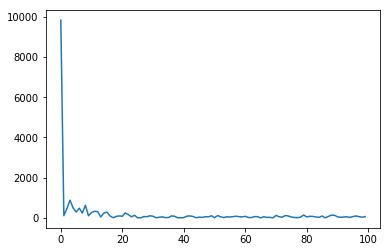

In [14]:

plt.plot(losses)
plt.show()


[37386.586]


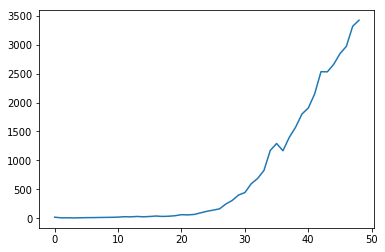

In [43]:

length_losses = test(model, high=50)
plt.plot(length_losses)

In [16]:

    
    
data, label = sampler(length=10, batch=3)
model = LSTMAtt().cuda()
x = model(data)
print(x)

Variable containing:
(0 ,.,.) = 
 -0.1850

(1 ,.,.) = 
 -0.1881

(2 ,.,.) = 
 -0.1834
[torch.cuda.FloatTensor of size 3x1x1 (GPU 0)]



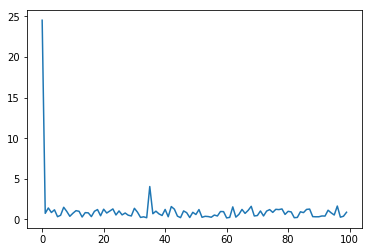

In [43]:
model = LSTMAtt(hidden_dim=128).cuda()
losses = train(model, low=1, high=20)
plt.plot(losses)

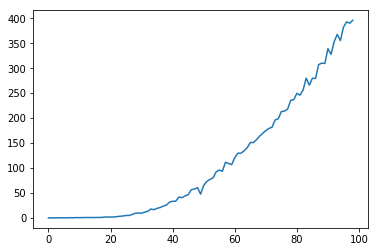

In [44]:
## test generalization to longer sequences than seen

length_losses = test(model, high=100)
plt.plot(length_losses)

In [47]:
length = 30
data, label = sampler(length=length, batch=1)
model.eval()
x, att = model.test_att(data)
att = att.data.cpu().numpy().flatten()

print(x)

print(att)
print(data.data.cpu().numpy())

data = data.data.cpu().numpy()[0].astype('int')
att = np.repeat(att, 2)

Variable containing:
(0 ,.,.) = 
  4.9170
[torch.cuda.FloatTensor of size 1x1x1 (GPU 0)]

[0.06912032 0.06324742 0.06492888 0.06364674 0.06400149 0.05947411
 0.04921124 0.04327369 0.03334971 0.02804038 0.02077445 0.0173232
 0.01306122 0.01071426 0.00942975 0.00950609 0.00976664 0.00985526
 0.01170486 0.01407015 0.01646395 0.02045399 0.02583749 0.03347417
 0.03893216 0.04278332 0.04454098 0.04488367 0.03935856 0.02877189]
[[1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  1. 1. 1. 0. 0. 0.]]


(60,)
[1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0]


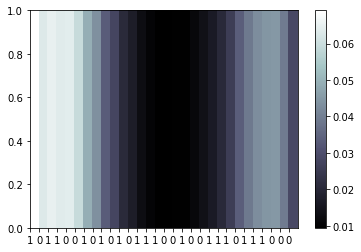

Variable containing:
(0 ,.,.) = 
  4.9170
[torch.cuda.FloatTensor of size 1x1x1 (GPU 0)]
 Variable containing:
 9
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [48]:


#data = (np.repeat(data, 1, axis=1))

#att =np.log(att)

axis = plt.gca()
#axis.set_aspect('equal') # X scale matches Y scale
heatmap = axis.pcolor([att], cmap='bone')
#plt.axis('off')
print(att.shape)
#plt.set_xticklabels(data[0])
#plt.subplot(1, 5, 5)
axis.set_xticks(range(0, length * 2 , 2), minor=False)       # Get locations and labels
print(data)
axis.set_xticklabels(data)
#print(locs)
#plt.xticks(range(0, 20, 1), [data[0]])  # Set locations and labels

plt.colorbar(mappable=heatmap) # Tells plt where it should find the color info.
plt.show()
#plt.gca().remove()
print(x, label)

In [230]:

data, label = sampler(length=10, batch=12)
model = MeanFieldCRF().cuda()
x = model(data)

print(x.data.cpu().numpy().flatten())

[0.05397202 0.07117224 0.06131057 0.06348418 0.06942981 0.06420679
 0.06477425 0.05529935 0.06825701 0.06923447 0.05777654 0.06508371]


0 2868.2148 29683.34
100 2995.2852 5772.706
200 2355.3235 4626.391
300 5792.3867 8240.285
400 1661.2598 2296.0146
500 1079.8575 7984.0
600 808.7303 6584.56
700 1111.0596 2527.9607
800 904.0042 5814.866
900 338.7043 5554.0356
1000 210.91699 8312.562
1100 1926.395 3028.0762
1200 793.65704 5815.355
1300 1243.8678 1724.1935
1400 813.85767 4815.8936
1500 168.96893 7742.3755
1600 1026.9333 2826.9824
1700 534.2302 4468.3833
1800 611.76874 1825.6527
1900 432.10745 3538.2837
2000 329.6899 1536.5094
2100 345.08105 1919.2756
2200 276.8744 2181.001
2300 376.99292 1545.5833
2400 185.9203 2607.2764
2500 342.5709 2523.2668
2600 3582.3623 2487.6775
2700 765.62256 4904.3887
2800 318.30423 1508.6362
2900 993.37177 2858.3894
3000 609.25946 1685.1852
3100 1612.2865 3446.6338
3200 739.83185 5109.3193
3300 190.01172 3584.9888
3400 252.00862 4006.5793
3500 2087.702 4321.5854
3600 1084.7281 1917.3115
3700 198.58882 2606.1428
3800 344.70703 2999.941
3900 596.47565 2635.7131
4000 257.5629 2165.0232
4100 224.166

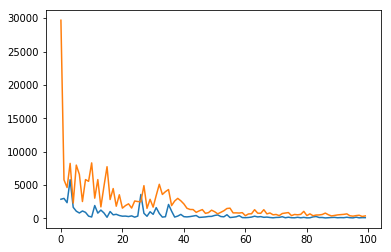

In [240]:
model = MeanFieldCRF(hidden_dim=128, spin_dim=16).cuda()
losses = train(model, low=15, high=70, lr=0.001, mom=0.9, epoch=10000)
plt.plot(losses[0])
plt.plot(losses[1])

In [186]:
print(losses)

[[197.54738, 75.45944, 46.889965, 224.21483, 50.20137, 5.588205, 47.36618, 15.797326, 14.654335, 63.54521, 24.8607, 30.54896, 11.793689, 29.430342, 12.246543, 12.056607, 29.340647, 17.742865, 8.937378, 8.7106905, 24.244074, 25.069681, 8.122388, 15.064667, 23.143206, 66.14734, 45.96999, 13.9001875, 13.026696, 38.897068, 22.24465, 56.01933, 20.939325, 9.905381, 16.606102, 25.185904, 24.516794, 28.156515, 10.568385, 39.444294, 8.9321375, 27.21232, 24.26285, 40.597324, 8.847032, 23.52913, 36.574352, 23.073618, 12.676234, 22.961931], [Variable containing:
 3035.1084
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
 392.5005
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
 406.9398
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
 610.2806
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
 270.9160
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variable containing:
 323.3076
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Variabl

[58585.133]


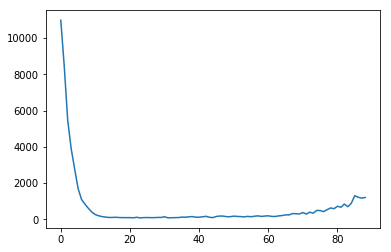

In [243]:
## test generalization to longer sequences than seen

length_losses = test(model, high=90)
plt.plot(length_losses)

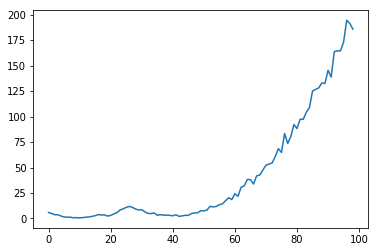

In [83]:
length_losses = test(model, high=100)
plt.plot(length_losses)

(404,)


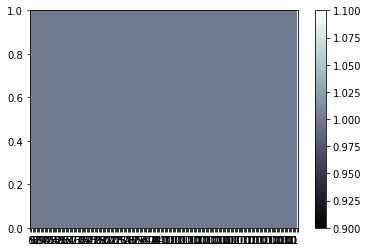

Variable containing:
(0 ,.,.) = 
  159.7784
[torch.cuda.FloatTensor of size 1x1x1 (GPU 0)]
 Variable containing:
 193
[torch.cuda.FloatTensor of size 1 (GPU 0)]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [245]:
length = 100
data, label = sampler(length=length, batch=1)
model.eval()
x, att = model.test_att(data)
att = att.data.cpu().numpy().flatten()

#print(x)
#
#print(att)
#print(data.data.cpu().numpy())

data = data.data.cpu().numpy()[0].astype('int')
att = np.repeat(att, 2)
#data = (np.repeat(data, 1, axis=1))
#print(att)
#att =np.log(att)

axis = plt.gca()
#axis.set_aspect('equal') # X scale matches Y scale
heatmap = axis.pcolor([att], cmap='bone')
#plt.axis('off')
print(att.shape)
#plt.set_xticklabels(data[0])
#plt.subplot(1, 5, 5)
axis.set_xticks(range(0, (length + 2) * 4 , 2), minor=False)       # Get locations and labels
#print(data)
#axis.set_xticklabels(data[:length] * data[-length:] + data[length:])
axis.set_xticklabels(data)
#print(locs)
#plt.xticks(range(0, 20, 1), [data[0]])  # Set locations and lab
plt.colorbar(mappable=heatmap) # Tells plt where it should find the color info.
plt.show()
#plt.gca().remove()
print(x, label)
print(att)

Variable containing:
   -0     1     1  ...      1     1     1
    1    -0     1  ...      1     1     1
    1     1    -0  ...      1     1     1
       ...          ⋱          ...       
    1     1     1  ...     -0     1     1
    1     1     1  ...      1    -0     1
    1     1     1  ...      1     1    -0
[torch.cuda.FloatTensor of size 42x42 (GPU 0)]

[[-0.          0.99142665  0.9833467  ... -0.7988026   0.11189377
  -0.676978  ]
 [ 0.99142665 -0.          0.9967762  ... -0.80166537  0.1481923
  -0.68700784]
 [ 0.9833467   0.9967762  -0.         ... -0.7901639   0.16968079
  -0.6774572 ]
 ...
 [-0.7988026  -0.80166537 -0.7901639  ... -0.          0.3680974
   0.7882474 ]
 [ 0.11189377  0.1481923   0.16968079 ...  0.3680974  -0.
   0.31263012]
 [-0.676978   -0.68700784 -0.6774572  ...  0.7882474   0.31263012
  -0.        ]]
[[-0.          0.99142665 -0.         ... -0.         -0.
  -0.        ]
 [ 0.99142665 -0.          0.99677622 ... -0.         -0.
  -0.        ]
 [-0.    

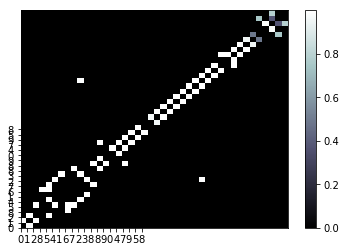

Variable containing:
(0 ,.,.) = 
  59.5813
[torch.cuda.FloatTensor of size 1x1x1 (GPU 0)]
 Variable containing:
 67
[torch.cuda.FloatTensor of size 1 (GPU 0)]

[0.97548974 0.97548974 0.99217117 0.99217117 0.9970186  0.9970186
 0.9999974  0.9999974  0.99978024 0.99978024 0.9977494  0.9977494
 0.64994735 0.64994735 0.99989116 0.99989116 0.99972636 0.99972636
 0.840785   0.840785   0.77232796 0.77232796 0.9998654  0.9998654
 0.9994671  0.9994671  0.9984542  0.9984542  0.02828183 0.02828183
 0.8791176  0.8791176  0.99812096 0.99812096 0.99925953 0.99925953
 0.74459004 0.74459004 0.66935664 0.66935664 0.44834968 0.44834968
 0.6237007  0.6237007  0.6935744  0.6935744  0.7063961  0.7063961
 0.7181803  0.7181803  0.84900516 0.84900516 0.74915594 0.74915594
 0.6172688  0.6172688  0.4688814  0.4688814  0.32222614 0.32222614
 0.22775282 0.22775282 0.14401366 0.14401366 0.07184152 0.07184152
 0.06916599 0.06916599 0.06566042 0.06566042 0.06237595 0.06237595
 0.06173729 0.06173729 0.04233392 0.0423

In [229]:

#print(model.unary_)
#print(model.potential_)
a = model.potential_ 
b = torch.sum(a, dim=1) + model.unary_
time_dim = a.shape[1]
mask = Variable(torch.eye(time_dim)).cuda()
mask = -1 * (mask - 1)
print(mask)
a = a * mask
from scipy.sparse.csgraph import minimum_spanning_tree as mst

a = a.data.cpu().numpy()[0]
print(a)
c = -mst(-a).toarray()
c = c + c.T
print(c)
axis = plt.gca()
#axis.set_aspect('equal') # X scale matches Y scale
heatmap = axis.pcolor(c, cmap='bone')
#plt.axis('off')
print(c.shape)
#plt.set_xticklabels(data[0])
#plt.subplot(1, 5, 5)
axis.set_xticks(range(0, length ,), minor=False)       # Get locations and labels
#print(data)
axis.set_xticklabels(data)

axis.set_yticks(range(0, length ,), minor=False)       # Get locations and labels
#print(data)
axis.set_yticklabels(data)
#print(locs)
#plt.xticks(range(0, 20, 1), [data[0]])  # Set locations and labels

plt.colorbar(mappable=heatmap) # Tells plt where it should find the color info.
plt.show()
#plt.gca().remove()
print(x, label)
print(att)

In [202]:
model.__dict__


{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend at 0x7fc15b39d978>,
 '_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('lstm', LSTM(1, 64, bidirectional=True)),
              ('hid2out', Linear(in_features=128, out_features=1)),
              ('unary', Linear(in_features=128, out_features=1)),
              ('hid2spin', Sequential(
                 (0): Linear(in_features=128, out_features=128)
                 (1): ReLU()
                 (2): Linear(in_features=128, out_features=8)
               ))]),
 '_parameters': OrderedDict(),
 'bi': True,
 'hidden': (Variable containing:
  (0 ,.,.) = 
  
  Columns 0 to 8 
    -1.3078  0.6208  0.4437  1.3983  2.6316 -0.6277  0.0992 -0.6374 -1.3178
  
  Columns 9 to 17 
    -2.5621 -0.9875 -0.5857 -0.9119  0.5994 -0.0027  0.3114  1.3893  0.3089
  
  Columns 18 to 26 
     0.8594  0.7845  1.0515  0.5013  2.2530  0.5288 -2.0077 -

In [4]:


data, label = sampler(length=10, batch=12)
model = MeanFieldCRF().cuda()
x = model(data)

print(x.data.cpu().numpy().flatten())

[0.14463414 0.17025001 0.14932343 0.1688031  0.1636047  0.1474696
 0.16062883 0.13923885 0.16450849 0.12514716 0.14453907 0.1426973 ]


In [ ]:
model = MeanFieldCRF(hidden_dim=128, spin_dim=16).cuda()
losses = train(model, low=3, high=20, lr=0.001, mom=0.9, epoch=10000)
plt.plot(losses[0])
plt.plot(losses[1])

0 929.853 4137.6724
100 28.485207 908.1155
200 61.354847 961.2115
300 39.509487 581.8498
400 33.397125 208.84908
500 14.314771 269.6064
600 39.367584 204.08775
700 35.91816 238.64238
800 20.440386 164.3056
900 7.88866 228.17004
1000 20.24958 179.1578
1100 140.00291 282.25394
1200 22.533934 154.36421
1300 18.538816 157.35838
1400 39.0364 127.1105
1500 11.606898 152.12428
1600 20.458298 200.60529
1700 6.097201 181.07745
1800 31.782618 103.836
1900 32.810574 200.81995
2000 6.2172337 147.63199
2100 10.134967 101.495804
2200 21.572014 120.70582
2300 18.412962 98.64988
2400 8.06537 171.83403
